# 🧭 Docling Tutorial Notebook


This notebook demonstrates how to use **Docling** for parsing and understanding various document formats (PDF, PPTX, DOCX) and integrating it with LLMs.


You’ll learn how to:
1. Parse structured and unstructured documents using Docling.
2. Compare Docling with traditional text extractors like PyPDF2.
3. Handle scanned or non-machine-readable PDFs.
4. Combine Docling with Trafilatura to parse webpages.
5. Generate insights, summaries, and Markdown reports from full documents.

## Install Dependencies
This cell installs all required Python libraries for document parsing and analysis.

In [ ]:
pip install docling
pip install PyPDF2


## Parsing a research paper - 
## We first try to parse with a PDF Reader

In [26]:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Step 1: Download the PDF from the URL
url = "https://arxiv.org/pdf/2408.09869"
response = requests.get(url)
response.raise_for_status()  # raises an error if download fails

# Step 2: Load it into PyPDF2
reader = PdfReader(BytesIO(response.content))

# Step 3: Iterate through pages and extract text
for i, page in enumerate(reader.pages, start=1):
    text = page.extract_text()
    print(f"\n--- Page {i} ---\n")
    print(text)



--- Page 1 ---

Docling Technical Report
Version 1.0
Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos
Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer
Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta Rafael Teixeira de Lima
Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar
AI4K Group, IBM Research
R¨uschlikon, Switzerland
Abstract
This technical report introduces Docling , an easy to use, self-contained, MIT-
licensed open-source package for PDF document conversion. It is powered by
state-of-the-art specialized AI models for layout analysis (DocLayNet) and table
structure recognition (TableFormer), and runs efficiently on commodity hardware
in a small resource budget. The code interface allows for easy extensibility and
addition of new features and models.
1 Introduction
Converting PDF documents back into a machine-processable format has been a major challenge
for decades due to their huge variability in format

## Parsing a research paper with Docling

In [14]:
from docling.document_converter import DocumentConverter

source = "https://arxiv.org/pdf/2408.09869"  # file path or URL
converter = DocumentConverter()
doc = converter.convert(source).document

print(doc.export_to_markdown())  # output: "### Docling Technical Report[...]"

2025-10-06 09:16:06,204 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-06 09:16:06,230 - INFO - Going to convert document batch...
2025-10-06 09:16:06,235 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e647edf348883bed75367b22fbe60347
2025-10-06 09:16:06,241 - INFO - Accelerator device: 'mps'
2025-10-06 09:16:14,068 - INFO - Accelerator device: 'mps'
2025-10-06 09:16:29,786 - INFO - Accelerator device: 'mps'
2025-10-06 09:16:31,384 - INFO - Processing document 2408.09869v5.pdf
2025-10-06 09:18:21,155 - INFO - Finished converting document 2408.09869v5.pdf in 135.36 sec.


<!-- image -->

## Docling Technical Report

## Version 1.0

Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta Rafael Teixeira de Lima Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar

AI4K Group, IBM Research R¨ uschlikon, Switzerland

## Abstract

This technical report introduces Docling , an easy to use, self-contained, MITlicensed open-source package for PDF document conversion. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. The code interface allows for easy extensibility and addition of new features and models.

## 1 Introduction

Converting PDF documents back into a machine-processable format has been a major challenge for decades due to their huge vari

## Parsing a PPTX file

2025-10-06 08:15:05,224 - INFO - detected formats: [<InputFormat.PPTX: 'pptx'>]
2025-10-06 08:15:05,279 - INFO - Going to convert document batch...
2025-10-06 08:15:05,283 - INFO - Initializing pipeline for SimplePipeline with options hash 995a146ad601044538e6a923bea22f4e
2025-10-06 08:15:05,287 - INFO - Processing document Test.pptx
2025-10-06 08:15:06,526 - INFO - Finished converting document Test.pptx in 1.31 sec.
2025-10-06 08:15:06,541 - WARNING - Parameter `strict_text` has been deprecated and will be ignored.


---- Full Text ----
# Generative AI Accelerator

29th September 2025

Where we are?

x

Intro to Generative AI 

- Intro to AI

- History and evolution of AI

- Discriminative vs Generative AI

- AI Landscape

- Open Source vs Proprietary LMs

- Responsible AI - Ethics, Bias etc

LLM Foundations

 - Transformers Intuition

- Next Token Prediction - LLM Training Phases 

- Pre-training/ Post-training

- Model behaviour parameters  - Different types of LLMs

- Limitations of LLMs

Prompt Engineering 

- Prompting Techniques

- CoT/Tool Calling

- Prompt Evaluation

- Prompt Optimization - Context Engineering - Prompt Hacking/ Jailbreaks

RAG Systems

- RAG basics

- Different types of RAG

- RAG Evaluation

- Improving RAG performance

Designing LLM Systems 

- Choosing the right stack

- Evaluating LLM systems 

- Design Tradeoffs: Latency/Cost

- Performance Optimization 

- Security and Privacy 

- Case Study - Product Search

AI Agents

- Intro to Agents  - Tool Use and Memory

- Wor

/Users/tanmaydhote/Documents/src/ai-accelerator-walmart-scratch/.venv/lib/python3.9/site-packages/docling/datamodel/base_models.py:441: RuntimeWarning: Mean of empty slice
  np.nanmean(
/Users/tanmaydhote/Documents/src/ai-accelerator-walmart-scratch/.venv/lib/python3.9/site-packages/docling/datamodel/base_models.py:450: RuntimeWarning: Mean of empty slice
  np.nanmean(


ConversionResult(input=InputDocument(file=PurePosixPath('Test.pptx'), document_hash='0dddbf6f3d778969b292fb2f68d1fa22665036639900a01ebf41dbe38d59f41f', valid=True, limits=DocumentLimits(max_num_pages=9223372036854775807, max_file_size=9223372036854775807, page_range=(1, 9223372036854775807)), format=<InputFormat.PPTX: 'pptx'>, filesize=1350745, page_count=7), status=<ConversionStatus.SUCCESS: 'success'>, errors=[], pages=[], assembled=AssembledUnit(elements=[], body=[], headers=[]), timings={}, confidence=ConfidenceReport(parse_score=nan, layout_score=nan, table_score=nan, ocr_score=nan, pages=defaultdict(<class 'docling.datamodel.base_models.PageConfidenceScores'>, {}), mean_grade=<QualityGrade.UNSPECIFIED: 'unspecified'>, low_grade=<QualityGrade.UNSPECIFIED: 'unspecified'>, mean_score=nan, low_score=nan), document=DoclingDocument(schema_name='DoclingDocument', version='1.7.0', name='Test', origin=DocumentOrigin(mimetype='application/vnd.ms-powerpoint', binary_hash=1378153810510597020
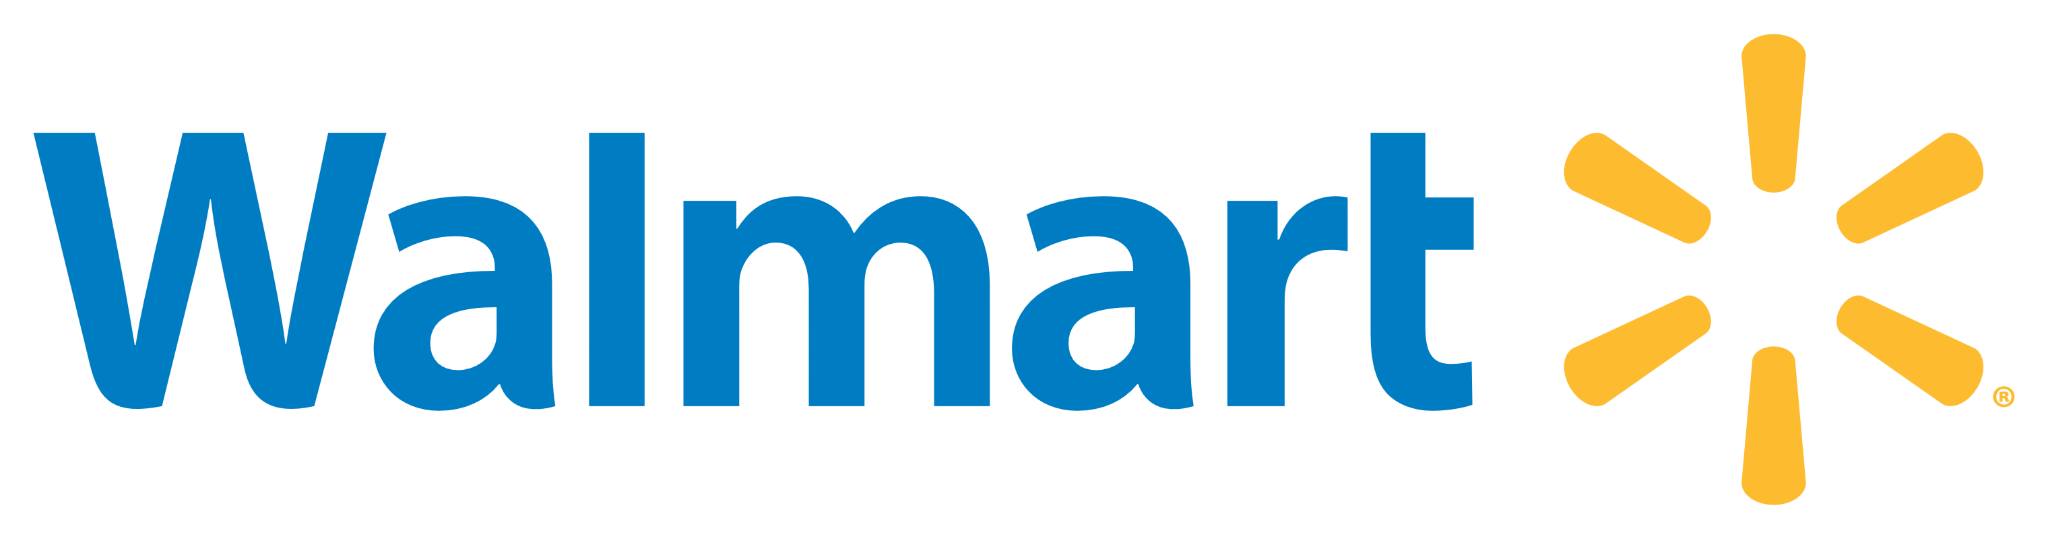
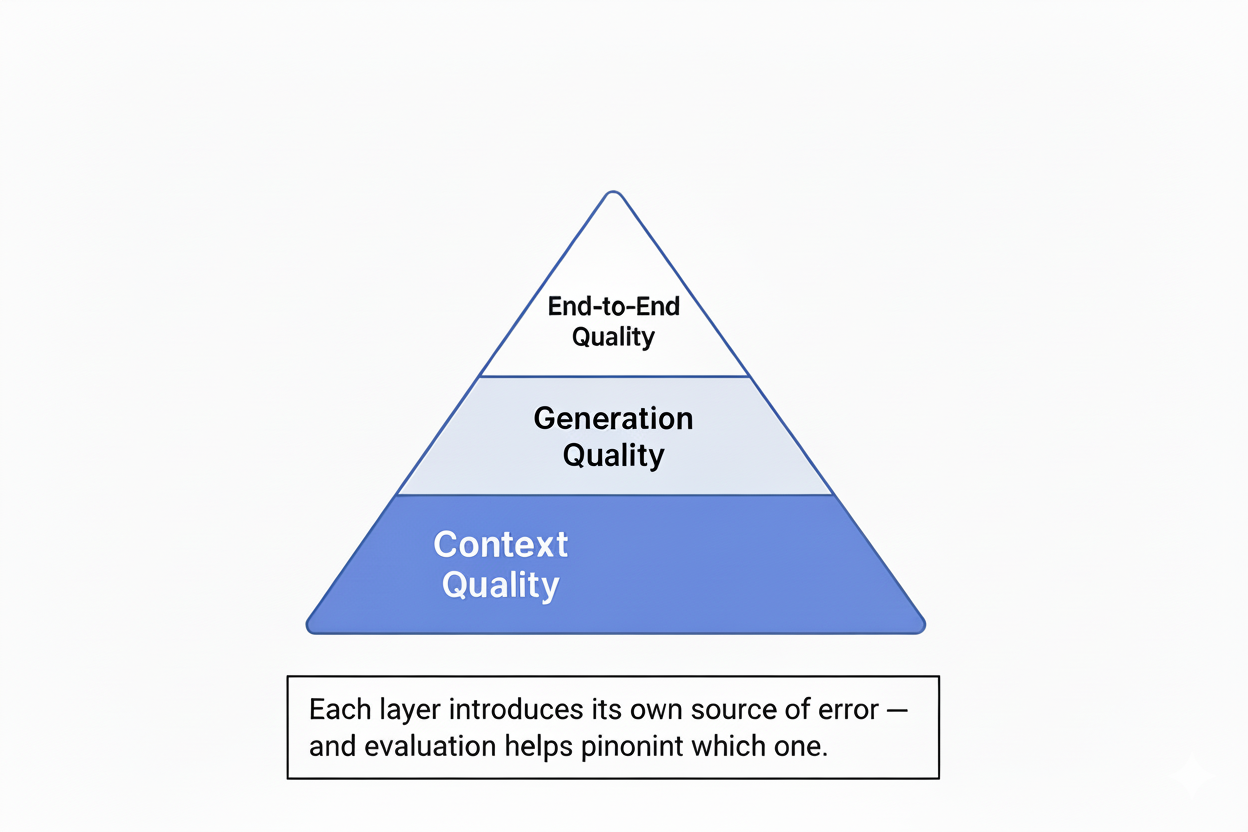

In [8]:
from docling.document_converter import DocumentConverter

def parse_pptx(source_path_or_url: str):
    converter = DocumentConverter()
    result = converter.convert(source_path_or_url)
    doc = result.document
    
    # Option 1: export entire PPTX as plain text
    full_text = doc.export_to_text()
    print("---- Full Text ----")
    print(full_text)
    
    # Option 2: export as Markdown
    md = doc.export_to_markdown()
    print("---- Markdown ----")
    print(md)
    
    
    return result

# Example usage:
pptx_path = "/Users/tanmaydhote/Downloads/Test.pptx"
parse_pptx(pptx_path)


## Parsing non-machine readable file

In [9]:
from docling.document_converter import DocumentConverter

def parse_pptx(source_path_or_url: str):
    converter = DocumentConverter()
    result = converter.convert(source_path_or_url)
    doc = result.document
    
    # Option 1: export entire PPTX as plain text
    full_text = doc.export_to_text()
    print("---- Full Text ----")
    print(full_text)
    
    # Option 2: export as Markdown
    md = doc.export_to_markdown()
    print("---- Markdown ----")
    print(md)
    
    
    return result

# Example usage:
pptx_path = "/Users/tanmaydhote/Downloads/NonReadable_PDF.pdf"
parse_pptx(pptx_path)


2025-10-06 08:16:23,323 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-06 08:16:23,355 - INFO - Going to convert document batch...
2025-10-06 08:16:23,356 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e647edf348883bed75367b22fbe60347
2025-10-06 08:16:23,362 - INFO - Accelerator device: 'mps'
2025-10-06 08:16:29,949 - INFO - Accelerator device: 'mps'
2025-10-06 08:16:35,249 - INFO - Accelerator device: 'mps'
2025-10-06 08:16:36,745 - INFO - Processing document NonReadable_PDF.pdf
2025-10-06 08:18:56,507 - INFO - Finished converting document NonReadable_PDF.pdf in 153.18 sec.
2025-10-06 08:18:56,843 - WARNING - Parameter `strict_text` has been deprecated and will be ignored.


---- Full Text ----
## Generative Al Accelerator

## Where we are?

## Intro to Generative AI

- Intro to AI
- Discriminative vs Generative Al
- and evolution of AI History
- Al Landscape

## LLM Foundations

- Transformers Intuition
- LLM Training Phases
- Next Token Prediction
- Pre-training/ Post-training
- Model behaviour parameters
- Responsible AI Ethics; Bias etc
- Open Source vs Proprietary LMs
- Different types of LLMs
- Limitations of LLMs

## Designing LLM Systems

- Choosing the right stack
- Design Tradeoffs: LatencylCost
- Evaluating LLM systems
- Performance Optimization
- Case Study Product Search
- Security and Privacy

## Al Agents

- Intro to Agents
- Tool Use and Memory
- Workflow vs Agents
- Agent orchestration patterns
- Agent Evaluation
- Model Context Protocol (MCP)

## Prompt Engineering

- Prompting Techniques
- Prompt Evaluation
- CoT/Tool Calling
- Prompt Optimization
- Context Engineering

## RAG Systems

- RAG basics
- Different types of RAG
- Improving RA

ConversionResult(input=InputDocument(file=PurePosixPath('NonReadable_PDF.pdf'), document_hash='a743c58a6df4d80b33c429f73b6612f33150bb25ee4375efb4276a37c219bf91', valid=True, limits=DocumentLimits(max_num_pages=9223372036854775807, max_file_size=9223372036854775807, page_range=(1, 9223372036854775807)), format=<InputFormat.PDF: 'pdf'>, filesize=376476, page_count=4), status=<ConversionStatus.SUCCESS: 'success'>, errors=[], pages=[Page(page_no=0, size=Size(width=720.0, height=405.0), predictions=PagePredictions(layout=LayoutPrediction(clusters=[Cluster(id=0, label=<DocItemLabel.PICTURE: 'picture'>, bbox=BoundingBox(l=285.8111572265625, t=154.49557495117188, r=427.613525390625, b=191.52403259277344, coord_origin=<CoordOrigin.TOPLEFT: 'TOPLEFT'>), confidence=0.9358761310577393, cells=[TextCell(index=0, rgba=ColorRGBA(r=0, g=0, b=0, a=255), rect=BoundingRectangle(r_x0=286.3333333333333, r_y0=188.33333333333334, r_x1=393.6666666666667, r_y1=188.33333333333334, r_x2=393.6666666666667, r_y2=16

In [10]:
from PyPDF2 import PdfReader

# Step 1: Specify the local file path
file_path = "/Users/tanmaydhote/Downloads/NonReadable_PDF.pdf"  # or an absolute path like "C:/Users/Tanmay/Downloads/paper.pdf"

# Step 2: Load the PDF file
reader = PdfReader(file_path)

# Step 3: Iterate through pages and extract text
for i, page in enumerate(reader.pages, start=1):
    text = page.extract_text()
    print(f"\n--- Page {i} ---\n")
    print(text)



--- Page 1 ---



--- Page 2 ---



--- Page 3 ---



--- Page 4 ---




## Parsing URLs

In [11]:
pip install trafilatura

Python(15644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 28.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.9/837.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [trafilatura] [dateparser]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
from docling.document_converter import DocumentConverter
import trafilatura

url = "https://www.slack.com"

downloaded = trafilatura.fetch_url(url)
text = trafilatura.extract(downloaded)

# Save to a temp file
with open("wiki_page.html", "w", encoding="utf-8") as f:
    f.write(text)

converter = DocumentConverter()
result = converter.convert("wiki_page.html")
print(result.document.export_to_markdown())


2025-10-06 09:14:01,380 - INFO - Redirecting https://www.slack.com -> https://slack.com/
2025-10-06 09:14:01,765 - INFO - Redirecting https://slack.com/ -> https://slack.com/intl/en-in/
2025-10-06 09:14:02,355 - INFO - detected formats: [<InputFormat.HTML: 'html'>]
2025-10-06 09:14:02,372 - INFO - Going to convert document batch...
2025-10-06 09:14:02,374 - INFO - Initializing pipeline for SimplePipeline with options hash 995a146ad601044538e6a923bea22f4e
2025-10-06 09:14:02,375 - INFO - Processing document wiki_page.html
2025-10-06 09:14:02,381 - INFO - Finished converting document wiki_page.html in 0.04 sec.


Bring your people, projects, apps and AI agents together.

Collaboration

Project management

integrations

Slack AI

Agentforce

Collaboration

Communicate in countless ways from one place.

Slack is built for bringing people and information together. Type things out. Talk things through. Invite external organisations into the conversation.

80%

of the Fortune 100 use Slack Connect to work with partners and customers1

Project management

Manage projects and move work forwards faster.

Prioritise tasks, share ideas and stay aligned. Slack brings every piece of your project together from start to finish.

47%

increase in productivity for teams using Slack2

Integrations

Tap into the tools that you already use.

Over 2,600 apps are ready to connect in Slack, so you can automate everyday tasks in the flow of work and save your team precious time.

35%

increase in time saved due to automation for Slack users3

Slack AI

Do more with AI that works where you do.

Search your entire comp

In [13]:
import requests
from bs4 import BeautifulSoup

# Step 1: Provide any webpage URL
url = "https://www.slack.com"

# Step 2: Download the HTML
response = requests.get(url)
response.raise_for_status()

# Step 3: Parse HTML
soup = BeautifulSoup(response.text, "html.parser")

# Step 4: Extract only visible text (skipping scripts, styles, etc.)
for script in soup(["script", "style", "noscript"]):
    script.extract()

text = soup.get_text(separator="\n", strip=True)

print(text[:1000])  # Print first 1000 chars


AI work management and productivity tools | Slack
Skip to main content
Features
COLLABORATION
Channels
Organise teams and work
Slack Connect
Work with external partners
Messaging
Chat with your team
Huddles
Meet using audio and video
Clips
Record and share updates
PROJECT MANAGEMENT
Templates
Start any task, fast
Canvas
Create rich, flexible docs
Lists
Organise, track and manage projects
File sharing
Bring files into the flow of work
INTEGRATIONS
Workflow Builder
Automate everyday tasks
Apps & integrations
Connect your tools with Slack
Slack and Salesforce
Bring CRM insights into Slack
INTELLIGENCE
AI in Slack
Save time and work smarter with powerfully simple AI
Agentforce
Empower your whole team with AI-powered agents in Slack
Enterprise search
Find anything, all from a single search bar
ENTERPRISE PLATFORM
Security
Protect data, ensure compliance
Enterprise Key Management
Monitor and revoke access
Slack Atlas
Discover rich profiles and org charts
Watch demo
Download Slack
FEATURED
Se

## 🧠 Exercises


### 🧠 Exercise 1: Parse + Compare
**Goal:** Compare outputs from two libraries (e.g., PyPDF2 vs Docling).


**Prompt:**


Use PyPDF2 and Docling to extract text from the same PDF (e.g., an arXiv paper).


Observe the differences in formatting and text completeness.


Which parts (like tables, formulas, or headings) are preserved better?



**Learning Outcome:** Understand why “document understanding” is different from “text extraction.”


---


### 🧠 Exercise 2: Build a “Universal Parser”


**Goal:** Handle both document and webpage inputs.


**Prompt:**


Create a FastAPI backend to:


- Detect file type (PDF, PPTX, DOCX, or HTML).
- Use Docling for documents.
- Use Trafilatura + Docling for web pages.
- Output structured Markdown.


**Learning Outcome:** Learn to unify multiple parsers into one workflow.


---


### 🧠 Exercise 3: PDF to PPT


**Goal:** Convert a parsed PDF into slide content.


**Prompt:**


1. Parse a research paper PDF using Docling.
2. Identify key sections or bullet points using GPT.
3. Create each slidewith a title and 3–4 key bullets.

**Stretch:** Use the `python-pptx` library to auto-generate a PowerPoint presentation summarizing the paper.


**Learning Outcome:** Learn to repurpose structured document content into presentable formats automatically.